In [2]:
from requirements import *
from sklearn.cluster import KMeans


In [3]:
data_source = "./processed_online_shoppers_intension.csv"
all_data = pd.read_csv(data_source)
print(f"#rows: {all_data.shape[0]} #cols: {all_data.shape[1]}")
all_data.head()

#rows: 12330 #cols: 21


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_sin,Month_cos,New_Visitor,Other,Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,0.5,0.866025,0.0,0.0,1.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,0.5,0.866025,0.0,0.0,1.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,0.5,0.866025,0.0,0.0,1.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,0.5,0.866025,0.0,0.0,1.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0,0.5,0.866025,0.0,0.0,1.0


In [4]:
X_all = all_data.drop('Revenue',axis=1)
y_all = all_data['Revenue']

In [5]:
# selected_features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 19]
# selected_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month_sin', 'Month_cos', 'New_Visitor', 'Returning_Visitor']
selected_features = ['PageValues', 'ExitRates','Administrative','ProductRelated','ProductRelated_Duration',
                     'BounceRates','Month_sin']
X = X_all[selected_features]

In [6]:
df = pd.concat([X_all,y_all],axis=1)
abs(df.corr()['Revenue'])

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates                0.150673
ExitRates                  0.207071
PageValues                 0.492569
SpecialDay                 0.082305
OperatingSystems           0.014668
Browser                    0.023984
Region                     0.011595
TrafficType                0.005113
Weekend                    0.029295
Month_sin                  0.148378
Month_cos                  0.039452
New_Visitor                0.104136
Other                      0.007715
Returning_Visitor          0.103843
Revenue                    1.000000
Name: Revenue, dtype: float64

In [9]:
X_scaled

,PageValues,ExitRates,Administrative,ProductRelated,ProductRelated_Duration,BounceRates,Month_sin
0,-0.317178,3.229316,-0.696993,-0.691003,-0.624348,3.667189,0.611807
1,-0.317178,1.171473,-0.696993,-0.668518,-0.590903,-0.457683,0.611807
2,-0.317178,3.229316,-0.696993,-0.691003,-0.624348,3.667189,0.611807
3,-0.317178,1.994610,-0.696993,-0.668518,-0.622954,0.573535,0.611807
4,-0.317178,0.142551,-0.696993,-0.488636,-0.296430,-0.045196,0.611807
...,...,...,...,...,...,...,...
12325,0.342125,-0.288966,0.206173,0.478227,0.307822,-0.310366,-0.650188
12326,-0.317178,-0.447364,-0.696993,-0.601062,-0.380957,-0.457683,-1.112111
12327,-0.317178,0.897093,-0.696993,-0.578577,-0.528063,1.261014,-1.112111
12328,-0.317178,-0.453140,0.507228,-0.376210,-0.443536,-0.457683,-1.112111


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [ ]:
%%time
# split data into labeled and unlabeled
X_lab, X_unlab, y_lab, y_unlab = train_test_split(X_scaled , y_all, test_size=0.5, random_state=1, stratify=y_all)

# Split the labelled data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_lab, y_lab, test_size=0.20, random_state=1, stratify=y_lab)

under_sampler = RandomUnderSampler(random_state=12, sampling_strategy = 0.4)
X_train_undersampled, y_train_undersampled = under_sampler.fit_resample(X_train,y_train)

over_sampler = SMOTE(sampling_strategy=1.0)
X_train_sampled, y_train_sampled = over_sampler.fit_resample(X_train_undersampled, y_train_undersampled)

# create the training dataset input
X_train_mixed = np.concatenate((X_train_sampled, X_unlab))
# create "no label" for unlabeled data
nolabel = [-1 for _ in range(len(y_unlab))]
# recombine training dataset labels
y_train_mixed = np.concatenate((y_train_sampled, nolabel))

# summarize training set size
print('Labeled Train Set:', X_train_sampled.shape, y_train_sampled.shape)
print('Unlabeled Train Set:', X_unlab.shape, y_unlab.shape)
# summarize test set size
print('Test Set:', X_test.shape, y_test.shape)

Labeled Train Set: (3814, 7) (3814,)
Unlabeled Train Set: (6165, 7) (6165,)
Test Set: (1233, 7) (1233,)
CPU times: user 32.6 ms, sys: 0 ns, total: 32.6 ms
Wall time: 32.5 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9950e9f10>]],
      dtype=object)

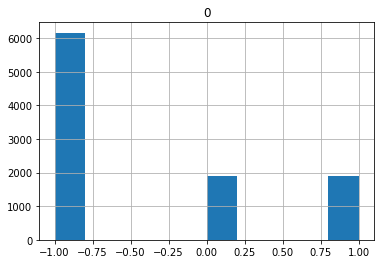

In [ ]:
pd.DataFrame(y_train_mixed).hist()

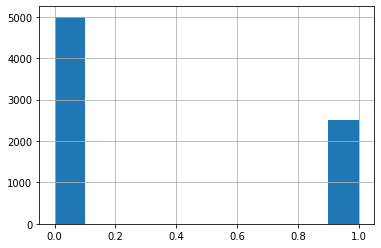

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=41,stratify=y_all)

sampler = RandomUnderSampler(sampling_strategy={0:2500})
X_train, y_train = sampler.fit_resample(X_train, y_train)

over_sampler = SMOTE(sampling_strategy={1:2500})
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

y_train.hist()

In [ ]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline


# sampler = RandomUnderSampler(sampling_strategy={0:5000})
# X_train, y_train = sampler.fit_resample(X_train, y_train)

# over_sampler = SMOTE(sampling_strategy={1:2500})
# X_train, y_train = over_sampler.fit_resample(X_train, y_train)


dtc = linear_model.LogisticRegression(solver="newton-cg", tol=1)
rbm = BernoulliRBM(n_iter=10, n_components=1000, learning_rate=0.04, random_state=0, verbose=True)

rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("dtc", dtc)])
# rbm.learning_rate = 1
# rbm.n_iter = 1
# # More components tend to give better prediction performance, but larger
# # fitting time
# rbm.n_components = 1000
logistic.C = 6000



rbm_features_classifier.fit(X_train, y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  "X does not have valid feature names, but"


[BernoulliRBM] Iteration 1, pseudo-likelihood = -4973161.43, time = 0.35s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  "X does not have valid feature names, but"


[BernoulliRBM] Iteration 2, pseudo-likelihood = -9947761.99, time = 0.64s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  "X does not have valid feature names, but"


[BernoulliRBM] Iteration 3, pseudo-likelihood = -14922355.97, time = 0.63s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  "X does not have valid feature names, but"


[BernoulliRBM] Iteration 4, pseudo-likelihood = -19896954.20, time = 0.72s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  "X does not have valid feature names, but"


[BernoulliRBM] Iteration 5, pseudo-likelihood = -24871539.99, time = 0.76s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  "X does not have valid feature names, but"


[BernoulliRBM] Iteration 6, pseudo-likelihood = -29846157.80, time = 0.57s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  "X does not have valid feature names, but"


[BernoulliRBM] Iteration 7, pseudo-likelihood = -34820760.26, time = 0.56s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  "X does not have valid feature names, but"


[BernoulliRBM] Iteration 8, pseudo-likelihood = -39795378.77, time = 0.55s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  "X does not have valid feature names, but"


[BernoulliRBM] Iteration 9, pseudo-likelihood = -44769964.79, time = 0.62s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but BernoulliRBM was fitted with feature names
  "X does not have valid feature names, but"


[BernoulliRBM] Iteration 10, pseudo-likelihood = -49744553.84, time = 0.60s


Pipeline(steps=[('rbm',
                 BernoulliRBM(learning_rate=0.04, n_components=1000,
                              random_state=0, verbose=True)),
                ('dtc', LogisticRegression(solver='newton-cg', tol=1))])

In [ ]:
y_pred = rbm_features_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

confusion_matrix(y_test,y_pred)

0.8450932684509327


array([[2084,    0],
       [ 382,    0]])

[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.57, time = 0.11s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -23.68, time = 0.15s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -22.74, time = 0.17s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.83, time = 0.14s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -21.62, time = 0.16s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -20.88, time = 0.14s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -20.83, time = 0.15s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -20.56, time = 0.13s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -20.27, time = 0.14s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -20.17, time = 0.14s
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       174
           1       0.91      0.95      0.93       184
           2       0.94      0.95      0.94       166
           3       0.95      0.88      0.91       19

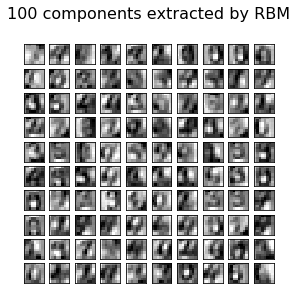

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from sklearn.base import clone


# #############################################################################
# Setting up


def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [1, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 1], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 1, 0]],
    ]

    def shift(x, w):
        return convolve(x.reshape((8, 8)), mode="constant", weights=w).ravel()

    X = np.concatenate(
        [X] + [np.apply_along_axis(shift, 1, X, vector) for vector in direction_vectors]
    )
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y


# Load Data
X, y = datasets.load_digits(return_X_y=True)
X = np.asarray(X, "float32")
X, Y = nudge_dataset(X, y)
X = minmax_scale(X, feature_range=(0, 1))  # 0-1 scaling

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Models we will use
logistic = linear_model.LogisticRegression(solver="newton-cg", tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])

# #############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, Y_train)

# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.0
raw_pixel_classifier.fit(X_train, Y_train)

# #############################################################################
# Evaluation

Y_pred = rbm_features_classifier.predict(X_test)
print(
    "Logistic regression using RBM features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred))
)

Y_pred = raw_pixel_classifier.predict(X_test)
print(
    "Logistic regression using raw pixel features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred))
)

# #############################################################################
# Plotting

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
plt.suptitle("100 components extracted by RBM", fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [ ]:
# sm = SMOTE(random_state=12, sampling_strategy = 1.0)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

> reconstruction error train=0.000, test=0.000
> classifier accuracy layers=2, train=0.834, test=0.830
> reconstruction error train=0.001, test=0.009
> classifier accuracy layers=3, train=0.830, test=0.836
> reconstruction error train=0.012, test=0.029
> classifier accuracy layers=4, train=0.810, test=0.812
> reconstruction error train=6.864, test=7.594
> classifier accuracy layers=5, train=0.538, test=0.504
> reconstruction error train=10.409, test=10.680
> classifier accuracy layers=6, train=0.342, test=0.326
> reconstruction error train=10.409, test=10.655
> classifier accuracy layers=7, train=0.342, test=0.326


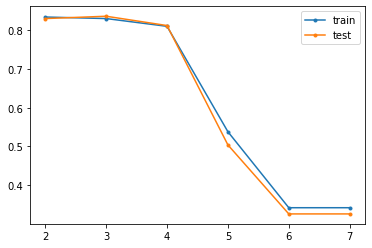

In [ ]:
# unsupervised greedy layer-wise pretraining for blobs classification problem
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

# prepare the dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, testX, trainy, testy

# define, fit and evaluate the base autoencoder
def base_autoencoder(trainX, testX):
	# define model
	model = Sequential()
	model.add(Dense(10, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(2, activation='linear'))
	# compile model
	model.compile(loss='mse', optimizer=SGD(learning_rate=0.01, momentum=0.9))
	# fit model
	model.fit(trainX, trainX, epochs=100, verbose=0)
	# evaluate reconstruction loss
	train_mse = model.evaluate(trainX, trainX, verbose=0)
	test_mse = model.evaluate(testX, testX, verbose=0)
	print('> reconstruction error train=%.3f, test=%.3f' % (train_mse, test_mse))
	return model

# evaluate the autoencoder as a classifier
def evaluate_autoencoder_as_classifier(model, trainX, trainy, testX, testy):
	# remember the current output layer
	output_layer = model.layers[-1]
	# remove the output layer
	model.pop()
	# mark all remaining layers as non-trainable
	for layer in model.layers:
		layer.trainable = False
	# add new output layer
	model.add(Dense(3, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=100, verbose=0)
	# evaluate model
	_, train_acc = model.evaluate(trainX, trainy, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	# put the model back together
	model.pop()
	model.add(output_layer)
	model.compile(loss='mse', optimizer=SGD(learning_rate=0.01, momentum=0.9))
	return train_acc, test_acc

# add one new layer and re-train only the new layer
def add_layer_to_autoencoder(model, trainX, testX):
	# remember the current output layer
	output_layer = model.layers[-1]
	# remove the output layer
	model.pop()
	# mark all remaining layers as non-trainable
	for layer in model.layers:
		layer.trainable = False
	# add a new hidden layer
	model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
	# re-add the output layer
	model.add(output_layer)
	# fit model
	model.fit(trainX, trainX, epochs=100, verbose=0)
	# evaluate reconstruction loss
	train_mse = model.evaluate(trainX, trainX, verbose=0)
	test_mse = model.evaluate(testX, testX, verbose=0)
	print('> reconstruction error train=%.3f, test=%.3f' % (train_mse, test_mse))

# prepare data
trainX, testX, trainy, testy = prepare_data()
# get the base autoencoder
model = base_autoencoder(trainX, testX)
# evaluate the base model
scores = dict()
train_acc, test_acc = evaluate_autoencoder_as_classifier(model, trainX, trainy, testX, testy)
print('> classifier accuracy layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
scores[len(model.layers)] = (train_acc, test_acc)
# add layers and evaluate the updated model
n_layers = 5
for _ in range(n_layers):
	# add layer
	add_layer_to_autoencoder(model, trainX, testX)
	# evaluate model
	train_acc, test_acc = evaluate_autoencoder_as_classifier(model, trainX, trainy, testX, testy)
	print('> classifier accuracy layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
	# store scores for plotting
	scores[len(model.layers)] = (train_acc, test_acc)
# plot number of added layers vs accuracy
keys = list(scores.keys())
pyplot.plot(keys, [scores[k][0] for k in keys], label='train', marker='.')
pyplot.plot(keys, [scores[k][1] for k in keys], label='test', marker='.')
pyplot.legend()
pyplot.show()

# Autoencoder based pretraining

> reconstruction error train=-1025.874, test=-980.311
> classifier accuracy layers=2, train=0.870, test=0.864
> reconstruction error train=817.516, test=772.789
> classifier accuracy layers=3, train=0.845, test=0.845
> reconstruction error train=-1026.468, test=-981.535
> classifier accuracy layers=4, train=0.512, test=0.506
> reconstruction error train=817.938, test=773.405
> classifier accuracy layers=5, train=0.845, test=0.845
> reconstruction error train=-974.347, test=-928.286
> classifier accuracy layers=6, train=0.848, test=0.849
> reconstruction error train=-1026.691, test=-981.780
> classifier accuracy layers=7, train=0.618, test=0.616


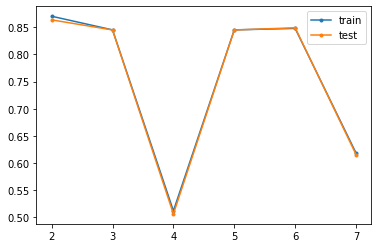

In [16]:
# unsupervised greedy layer-wise pretraining for blobs classification problem
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot


# prepare the dataset
def prepare_data(X_, y_):
  X_train, X_test, y_train, y_test = train_test_split(X_, to_categorical(y_), test_size=0.1, shuffle=True, stratify=to_categorical(y_))

  return X_train, X_test, y_train, y_test

# define, fit and evaluate the base autoencoder
def base_autoencoder(trainX, testX):
	# define model
	model = Sequential()
	model.add(Dense(10, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(20, activation='linear'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	# fit model
	model.fit(trainX, trainX, epochs=100, verbose=0)
	# evaluate reconstruction loss
	train_mse = model.evaluate(trainX, trainX, verbose=0)
	test_mse = model.evaluate(testX, testX, verbose=0)
	print('> reconstruction error train=%.3f, test=%.3f' % (train_mse, test_mse))
	return model

# evaluate the autoencoder as a classifier
def evaluate_autoencoder_as_classifier(model, trainX, trainy, testX, testy):
	# remember the current output layer
	output_layer = model.layers[-1]
	# remove the output layer
	model.pop()
	# mark all remaining layers as non-trainable
	for layer in model.layers:
		layer.trainable = False
	# add new output layer
	model.add(Dense(2, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=100, verbose=0)
	# evaluate model
	_, train_acc = model.evaluate(trainX, trainy, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	# put the model back together
	model.pop()
	model.add(output_layer)
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return train_acc, test_acc

# add one new layer and re-train only the new layer
def add_layer_to_autoencoder(model, trainX, testX):
	# remember the current output layer
	output_layer = model.layers[-1]
	# remove the output layer
	model.pop()
	# mark all remaining layers as non-trainable
	for layer in model.layers:
		layer.trainable = False
	# add a new hidden layer
	model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
	# re-add the output layer
	model.add(output_layer)
	# fit model
	model.fit(trainX, trainX, epochs=100, verbose=0)
	# evaluate reconstruction loss
	train_mse = model.evaluate(trainX, trainX, verbose=0)
	test_mse = model.evaluate(testX, testX, verbose=0)
	print('> reconstruction error train=%.3f, test=%.3f' % (train_mse, test_mse))

# prepare data
trainX, testX, trainy, testy = prepare_data(X_all, y_all)
# get the base autoencoder

model = base_autoencoder(trainX, testX)
# evaluate the base model
scores = dict()
train_acc, test_acc = evaluate_autoencoder_as_classifier(model, trainX, trainy, testX, testy)
print('> classifier accuracy layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
scores[len(model.layers)] = (train_acc, test_acc)
# add layers and evaluate the updated model
n_layers = 5
for _ in range(n_layers):
	# add layer
	add_layer_to_autoencoder(model, trainX, testX)
	# evaluate model
	train_acc, test_acc = evaluate_autoencoder_as_classifier(model, trainX, trainy, testX, testy)
	print('> classifier accuracy layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
	# store scores for plotting
	scores[len(model.layers)] = (train_acc, test_acc)
# plot number of added layers vs accuracy
keys = list(scores.keys())
pyplot.plot(keys, [scores[k][0] for k in keys], label='train', marker='.')
pyplot.plot(keys, [scores[k][1] for k in keys], label='test', marker='.')
pyplot.legend()
pyplot.show()

In [ ]:
sampler = RandomUnderSampler(sampling_strategy={0:2500})
X_all, y_all = sampler.fit_resample(X_all, y_all)

over_sampler = SMOTE(sampling_strategy={1:2500})
X_all, y_all = over_sampler.fit_resample(X_all, y_all)

In [ ]:
df = pd.concat([X_all,y_all],axis=1)
zero_df = df[df.Revenue == 0]
one_df = df[df.Revenue == 1]

print(f"{df.Revenue.value_counts()}")
print(f"zero_df.shape: {zero_df.shape}, one_df.shape: {one_df.shape}")

0    10422
1     1908
Name: Revenue, dtype: int64
zero_df.shape: (10422, 21), one_df.shape: (1908, 21)


In [ ]:
X_zero_df = zero_df.drop('Revenue',axis=1)
y_zero_df = zero_df['Revenue']

X_one_df = one_df.drop('Revenue',axis=1)
y_one_df = one_df['Revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, to_categorical(y_all), test_size=0.1, shuffle=True, stratify=to_categorical(y_all))

In [ ]:
print(f"Train shape: (X,y): {X_train.shape}, {y_train.shape}")
print(f"Test shape: (X,y): {X_test.shape}, {y_test.shape}")

Train shape: (X,y): (11097, 20), (11097, 2)
Test shape: (X,y): (1233, 20), (1233, 2)


## GFG: Feature extraction using Autoencoders & Training on a classifier

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

In [ ]:
# Loading the dataset
df = pd.read_csv('creditcard.csv')
  
# Making the Time values appropriate for future work
df['Time'] = df['Time'].apply(lambda x : (x / 3600) % 24)
  
# Separating the normal and fraudulent transactions
fraud = df[df['Class']== 1]
normal = df[df['Class']== 0].sample(2500)
  
# Reducing the dataset because of machinery constraints
df = normal.append(fraud).reset_index(drop = True)
  
# Separating the dependent and independent variables
y = df['Class']
X = df.drop('Class', axis = 1)

In [ ]:
df = pd.concat([X_all,y_all],axis=1)
zero_df = df[df.Revenue == 0]
one_df = df[df.Revenue == 1]

X_zero_df = zero_df.drop('Revenue',axis=1)
y_zero_df = zero_df['Revenue']

X_one_df = one_df.drop('Revenue',axis=1)
y_one_df = one_df['Revenue']

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,23.426944,-1.412431,-1.206578,-0.110491,-0.190864,1.121667,-1.991780,-0.429353,0.313218,0.014213,-0.851214,-1.067811,0.677430,0.707656,0.274482,-0.413522,0.315734,-0.429073,-0.407665,-0.651859,0.299248,0.243873,-0.025953,0.046423,0.105530,-0.202392,0.428767,-0.194204,-0.436328,30.00,0
1,20.866111,-1.291937,2.207782,-1.150456,3.157194,2.718568,4.680815,-0.207732,1.332230,-1.670417,2.537265,-0.398782,-0.509306,-0.034861,0.521999,0.775211,-0.428078,0.244806,-0.468337,1.217346,0.302376,-0.168629,-0.490724,0.246711,0.641408,-0.901810,-0.053230,-0.674872,-0.215664,0.75,0
2,20.243889,1.893703,-1.085271,-1.536425,-0.537900,-0.449044,-0.628553,-0.140314,-0.300801,-0.940011,1.059312,0.465850,0.731269,1.030314,0.316907,-0.207973,-1.107168,-0.687679,1.699193,-0.598530,-0.237757,-0.019323,0.198138,-0.080917,-0.434022,-0.068349,0.787326,-0.089210,-0.051916,154.96,0
3,19.235278,1.192250,0.100848,-0.031421,0.389255,0.079814,0.089738,-0.179192,0.196251,0.011107,-0.124978,1.017089,0.092346,-1.052719,0.157248,0.839728,0.645836,-0.153389,0.133690,-0.003274,-0.135339,-0.260452,-0.843025,0.065265,-0.743514,0.156290,0.152277,-0.022284,0.009766,14.99,0
4,21.005833,-2.005869,0.713738,0.498373,0.081422,-0.046166,-0.908075,0.924124,-0.252643,0.447077,0.865249,-0.176447,-0.901155,-1.906699,0.352487,1.105292,-0.478101,0.103360,-0.727786,-0.443202,-0.235509,-0.056398,0.187978,-0.232107,0.402827,-0.496408,0.170558,-0.702661,0.012583,67.60,0


In [ ]:
df['Class'].value_counts()

0    2500
1     492
Name: Class, dtype: int64

In [ ]:
# Scaling the data to make it suitable for the auto-encoder
X_scaled = MinMaxScaler().fit_transform(X_all)
X_zero_scaled = X_scaled[y_all == 0]
X_one_scaled = X_scaled[y_all == 1]

In [ ]:
# # Scaling the data to make it suitable for the auto-encoder
# X_scaled = MinMaxScaler().fit_transform(X)
# X_normal_scaled = X_scaled[y == 0]
# X_fraud_scaled = X_scaled[y == 1]

In [ ]:
X_scaled.head()

AttributeError: ignored

In [ ]:
# Building the Input Layer
input_layer = Input(shape =(X_all.shape[1], ))

# Building the Encoder network
encoded = Dense(100, activation ='tanh',
				activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation ='tanh',
				activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(25, activation ='tanh',
				activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(12, activation ='tanh',
				activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(6, activation ='relu')(encoded)

# Building the Decoder network
decoded = Dense(12, activation ='tanh')(encoded)
decoded = Dense(25, activation ='tanh')(decoded)
decoded = Dense(50, activation ='tanh')(decoded)
decoded = Dense(100, activation ='tanh')(decoded)

# Building the Output Layer
output_layer = Dense(X_all.shape[1], activation ='relu')(decoded)



In [ ]:
# # Defining the parameters of the Auto-encoder network
# autoencoder = Model(input_layer, output_layer)
# autoencoder.compile(optimizer ="adadelta", loss ="mse")
  
# # Training the Auto-encoder network
# autoencoder.fit(X_normal_scaled, X_normal_scaled, 
#                 batch_size = 16, epochs = 10, 
#                 shuffle = True, validation_split = 0.20)

Epoch 1/10
125/125 [==============================] - 1s 4ms/step - loss: 0.3192 - val_loss: 0.3146
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 0.3076 - val_loss: 0.3015
Epoch 3/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2941 - val_loss: 0.2882
Epoch 4/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2814 - val_loss: 0.2758
Epoch 5/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2683 - val_loss: 0.2619
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2546 - val_loss: 0.2487
Epoch 7/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2419 - val_loss: 0.2366
Epoch 8/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2304 - val_loss: 0.2256
Epoch 9/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2196 - val_loss: 0.2144
Epoch 10/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2080 - val_loss: 0.2032

In [ ]:
# Defining the parameters of the Auto-encoder network
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer ="adadelta", loss ="mse")
  
# Training the Auto-encoder network
autoencoder.fit(X_zero_scaled, X_zero_scaled, 
                batch_size = 16, epochs = 10, 
                shuffle = True, validation_split = 0.20)

Epoch 1/10
522/522 [==============================] - 3s 3ms/step - loss: 0.1257 - val_loss: 0.1146
Epoch 2/10
522/522 [==============================] - 1s 2ms/step - loss: 0.1129 - val_loss: 0.1015
Epoch 3/10
522/522 [==============================] - 1s 2ms/step - loss: 0.0983 - val_loss: 0.0886
Epoch 4/10
522/522 [==============================] - 1s 3ms/step - loss: 0.0850 - val_loss: 0.0789
Epoch 5/10
522/522 [==============================] - 1s 3ms/step - loss: 0.0748 - val_loss: 0.0731
Epoch 6/10
522/522 [==============================] - 1s 3ms/step - loss: 0.0681 - val_loss: 0.0702
Epoch 7/10
522/522 [==============================] - 1s 3ms/step - loss: 0.0639 - val_loss: 0.0692
Epoch 8/10
522/522 [==============================] - 1s 3ms/step - loss: 0.0615 - val_loss: 0.0691
Epoch 9/10
522/522 [==============================] - 1s 3ms/step - loss: 0.0600 - val_loss: 0.0693
Epoch 10/10
522/522 [==============================] - 1s 3ms/step - loss: 0.0590 - val_loss: 0.0696

In [ ]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])
hidden_representation.add(autoencoder.layers[4])

In [ ]:
# # Separating the points encoded by the Auto-encoder as normal and fraud
# normal_hidden_rep = hidden_representation.predict(X_normal_scaled)
# fraud_hidden_rep = hidden_representation.predict(X_fraud_scaled)
  
# # Combining the encoded points into a single table 
# encoded_X = np.append(normal_hidden_rep, fraud_hidden_rep, axis = 0)
# y_normal = np.zeros(normal_hidden_rep.shape[0])
# y_fraud = np.ones(fraud_hidden_rep.shape[0])
# encoded_y = np.append(y_normal, y_fraud)

In [ ]:
# Separating the points encoded by the Auto-encoder as normal and fraud
normal_hidden_rep = hidden_representation.predict(X_zero_scaled)
fraud_hidden_rep = hidden_representation.predict(X_one_scaled)
  
# Combining the encoded points into a single table 
encoded_X = np.append(normal_hidden_rep, fraud_hidden_rep, axis = 0)
y_normal = np.zeros(normal_hidden_rep.shape[0])
y_fraud = np.ones(fraud_hidden_rep.shape[0])
encoded_y = np.append(y_normal, y_fraud)

In [ ]:
# Splitting the encoded data for linear classification
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(encoded_X, encoded_y, test_size = 0.2,
                                                                                    stratify=encoded_y)

# Splitting the original data for non-linear classification
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, stratify=y_all)



In [ ]:
lrclf = LogisticRegression()
lrclf.fit(X_train_encoded, y_train_encoded)
  
# Storing the predictions of the linear model
y_pred_lrclf = lrclf.predict(X_test_encoded)
  
# Evaluating the performance of the linear model
print('Accuracy : '+str(accuracy_score(y_test_encoded, y_pred_lrclf)))
print(f1_score(y_test_encoded, y_pred_lrclf))
print(confusion_matrix(y_test_encoded, y_pred_lrclf))

Accuracy : 0.8442822384428224
0.035175879396984924
[[2075    9]
 [ 375    7]]


In [ ]:
lrclf = LogisticRegression()
lrclf.fit(X_train, y_train)
  
# Storing the predictions of the linear model
y_pred_lrclf = lrclf.predict(X_test)
  
# Evaluating the performance of the linear model
print('Accuracy : '+str(accuracy_score(y_test, y_pred_lrclf)))
print(f1_score(y_test, y_pred_lrclf))

Accuracy : 0.8896999188969992
0.5160142348754448


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Building the SVM model
svmclf = SVC()
svmclf.fit(X_train, y_train)
  
# Storing the predictions of the non-linear model
y_pred_svmclf = svmclf.predict(X_test)
  
# Evaluating the performance of the non-linear model
print('Accuracy : '+str(accuracy_score(y_test, y_pred_svmclf)))
print(f1_score(y_test, y_pred_svmclf))

Accuracy : 0.8483373884833739
0.041025641025641026


In [ ]:
pd.DataFrame(y_train_encoded).value_counts()

0.0    8355
1.0    1509
dtype: int64